# Hypertension Analysis

@Yu-Wei Hsu

Set up environment

In [ ]:
# Import libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
# Set the graph size
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (18,6)

In [ ]:
df = pd.read_csv("Disease.csv")
print('Shape of dataset:',df.shape)

Shape of dataset: (21613, 22)


EDA

In [ ]:
df.head()

,HY_YN,AGE,gender,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,SGOT_ASL,SGPT_ALT,GAMMA_GTP,HMG,H_APOP_YN,H_HDISE_YN,H_DIABML_YN,F_APOP_YN,F_HDISE_YN,F_HPRT_YN,F_DIABML_YN,DSQTY,SMK_TERM,EXER_M
0,1,66,1,76.0,120.0,70.0,87.0,199.0,22.0,13.0,22.0,15.0,0,0,0,0,0,0,0,0,5,Once a week
1,1,55,1,84.0,110.0,80.0,85.0,178.0,40.0,35.0,72.0,14.9,0,0,0,0,0,0,0,0,0,Never
2,1,54,0,84.0,117.0,76.0,92.0,195.0,20.0,20.0,15.0,13.3,0,0,0,0,0,0,0,0,0,Once a week
3,1,29,1,80.0,126.0,82.0,86.0,150.0,25.0,27.0,35.0,17.0,0,0,0,0,0,0,0,1,3,Once a week
4,1,43,1,82.0,130.0,85.0,104.0,134.0,31.0,23.0,46.0,14.1,0,0,0,0,0,0,0,2,3,Once a week


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HY_YN        21613 non-null  int64  
 1   AGE          21613 non-null  int64  
 2   gender       21613 non-null  int64  
 3   WAIST        21569 non-null  float64
 4   BP_HIGH      21610 non-null  float64
 5   BP_LWST      21610 non-null  float64
 6   BLDS         21612 non-null  float64
 7   TOT_CHOLE    21613 non-null  float64
 8   SGOT_ASL     21586 non-null  float64
 9   SGPT_ALT     21591 non-null  float64
 10  GAMMA_GTP    21532 non-null  float64
 11  HMG          21607 non-null  float64
 12  H_APOP_YN    21613 non-null  int64  
 13  H_HDISE_YN   21613 non-null  int64  
 14  H_DIABML_YN  21613 non-null  int64  
 15  F_APOP_YN    21613 non-null  int64  
 16  F_HDISE_YN   21613 non-null  int64  
 17  F_HPRT_YN    21613 non-null  int64  
 18  F_DIABML_YN  21613 non-null  int64  
 19  DSQT

In [ ]:
# Encoding manually
df['EXER_M'] = df['EXER_M'].replace({'Never':0, 'Once a week':1, '2-3 a week':2,
                                     '4-5 a week':3, '>5 a week':4})
df.EXER_M.unique()

array([1, 0, 2, 4, 3])

In [ ]:
for col in df.columns:
  print('{}: {}\n'.format(col,df[col].unique()))

HY_YN: [1 0]

AGE: [66 55 54 29 43 53 47 50 56 51 32 61 48 64 46 58 38 41 44 60 49 62 59 37
 33 28 45 36 30 39 40 31 34 57 23 52 35 42 25 68 27 63 20 67 65 69 26 24
 21 22]

gender: [1 0]

WAIST: [ 76.  84.  80.  82.  78.  77.  81.  86. 105.  85.  69.  75.  88.  79.
  96.  92.  74.  90.  93.  89.  63.  87.  73. 100. 104.  70.  91. 101.
  83.  72.  95.  94.  68.  66.  71.  65. 109.  67.  97.  99.  98. 112.
  nan  64. 103. 113. 102. 118.  62. 106. 115. 111. 110.  61.  60. 116.
 114. 108. 107.  56. 122.  58.  59.  57.  53.  54.   9.  55. 117. 120.
  46.   5.]

BP_HIGH: [120. 110. 117. 126. 130. 115. 138. 135. 139. 128. 134. 121. 106. 137.
 124. 111. 136. 127. 129. 100. 113. 105. 119. 122. 131. 112. 116. 125.
  91.  93.  99. 118. 133. 132. 107. 123. 101. 114.  98. 109. 104. 108.
  90. 102.  95.  96.  97. 103.  83.  92.  94.  81.  85.  86.  89.  87.
  88.  84.  80.  nan  82.]

BP_LWST: [70. 80. 76. 82. 85. 78. 89. 84. 74. 73. 86. 88. 71. 60. 75. 66. 77. 83.
 81. 79. 72. 67. 64. 68. 65. 87. 

In [ ]:
# Slice numerical and categorical features
cat_col = ['gender','H_APOP_YN','H_HDISE_YN', 'H_DIABML_YN', 'F_APOP_YN', 
            'F_HDISE_YN', 'F_HPRT_YN','F_DIABML_YN', 'DSQTY', 'SMK_TERM', 'EXER_M']
num_col = [c for c in df.columns if c not in cat_col]
num_col.remove('HY_YN')

In [ ]:
# Check missing value
df.isna().sum()

HY_YN           0
AGE             0
gender          0
WAIST          44
BP_HIGH         3
BP_LWST         3
BLDS            1
TOT_CHOLE       0
SGOT_ASL       27
SGPT_ALT       22
GAMMA_GTP      81
HMG             6
H_APOP_YN       0
H_HDISE_YN      0
H_DIABML_YN     0
F_APOP_YN       0
F_HDISE_YN      0
F_HPRT_YN       0
F_DIABML_YN     0
DSQTY           0
SMK_TERM        0
EXER_M          0
dtype: int64

In [ ]:
df.describe()

,HY_YN,AGE,gender,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,SGOT_ASL,SGPT_ALT,GAMMA_GTP,HMG,H_APOP_YN,H_HDISE_YN,H_DIABML_YN,F_APOP_YN,F_HDISE_YN,F_HPRT_YN,F_DIABML_YN,DSQTY,SMK_TERM,EXER_M
count,21613.000000,21613.000000,21613.000000,21569.000000,21610.000000,21610.000000,21612.000000,21613.000000,21586.000000,21591.000000,21532.000000,21607.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,0.249988,42.632721,0.581687,79.605220,118.843822,74.307589,94.031094,191.676954,24.345270,24.870965,33.603427,14.066872,0.000740,0.001157,0.001990,0.048489,0.028455,0.088558,0.087031,0.599408,1.122102,0.783047
std,0.433016,11.609856,0.493294,8.996495,11.375061,7.948683,20.924283,35.601369,11.446885,18.145078,32.366754,1.604155,0.027199,0.033992,0.044561,0.214803,0.166273,0.284111,0.281887,1.003226,1.625848,1.009663
min,0.000000,20.000000,0.000000,5.000000,80.000000,42.000000,40.000000,66.000000,2.000000,2.000000,2.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,33.000000,0.000000,73.000000,110.000000,70.000000,83.000000,166.000000,18.000000,14.000000,15.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,42.000000,1.000000,80.000000,120.000000,75.000000,91.000000,189.000000,22.000000,20.000000,23.000000,14.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,51.000000,1.000000,86.000000,130.000000,80.000000,99.000000,213.000000,27.000000,29.000000,38.000000,15.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000
max,1.000000,69.000000,1.000000,122.000000,139.000000,89.000000,500.000000,468.000000,196.000000,198.000000,300.000000,19.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,6.000000,4.000000


In [ ]:
# Check outlier
outliers = df[~(np.abs(stats.zscore(df[num_col])) < 3).all(axis=1)]
print('Number of outlier: ',len(outliers))

Number of outlier:  21613


In [ ]:
# Data cleaning
df = df.dropna()
df = df[(np.abs(stats.zscore(df[num_col])) < 3).all(axis=1)]
print('After dropping the outliers, the shape of the data:',df.shape)

After dropping the outliers, the shape of the data: (19875, 22)


In [ ]:
df.describe()

,HY_YN,AGE,gender,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,SGOT_ASL,SGPT_ALT,GAMMA_GTP,HMG,H_APOP_YN,H_HDISE_YN,H_DIABML_YN,F_APOP_YN,F_HDISE_YN,F_HPRT_YN,F_DIABML_YN,DSQTY,SMK_TERM,EXER_M
count,19875.000000,19875.000000,19875.000000,19875.000000,19875.000000,19875.000000,19875.000000,19875.000000,19875.000000,19875.000000,19875.000000,19875.000000,19875.000000,19875.000000,19875.000000,19875.000000,19875.000000,19875.000000,19875.000000,19875.000000,19875.000000,19875.000000
mean,0.241962,42.470943,0.567899,79.168604,118.621585,74.166943,91.888755,190.306214,22.835421,22.327748,29.037585,14.049681,0.000704,0.001157,0.001509,0.048352,0.028679,0.088956,0.083572,0.575698,1.080604,0.782038
std,0.428282,11.646607,0.495381,8.736041,11.312505,7.881168,13.108190,33.751349,6.938105,11.899374,20.953630,1.526432,0.026532,0.033999,0.038823,0.214515,0.166908,0.284687,0.276752,0.983993,1.602474,1.010506
min,0.000000,20.000000,0.000000,53.000000,85.000000,51.000000,40.000000,89.000000,2.000000,2.000000,2.000000,9.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,33.000000,0.000000,73.000000,110.000000,70.000000,83.000000,166.000000,18.000000,14.000000,15.000000,12.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,42.000000,1.000000,79.000000,120.000000,75.000000,90.000000,188.000000,22.000000,19.000000,22.000000,14.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,51.000000,1.000000,85.000000,130.000000,80.000000,98.000000,212.000000,26.000000,27.000000,35.000000,15.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000
max,1.000000,69.000000,1.000000,106.000000,139.000000,89.000000,155.000000,298.000000,55.000000,77.000000,129.000000,18.700000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,6.000000,4.000000


Visualization

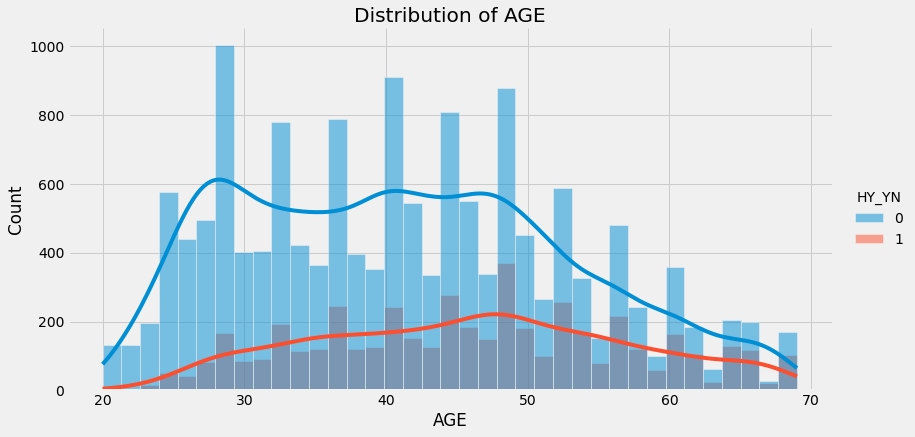

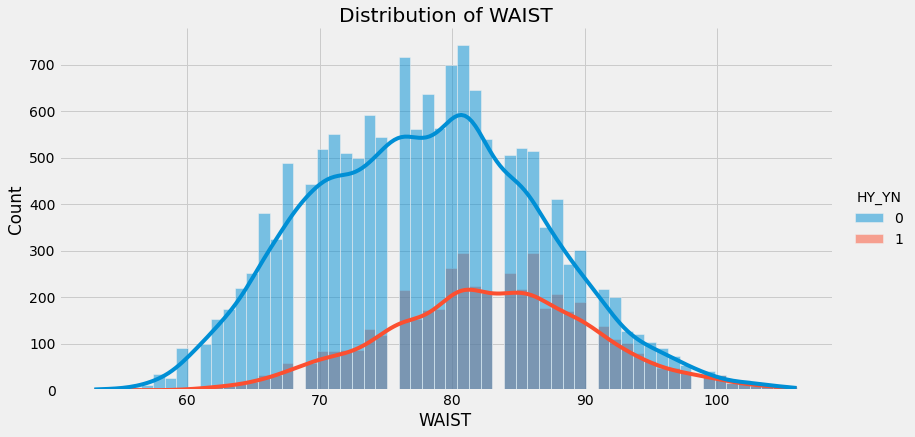

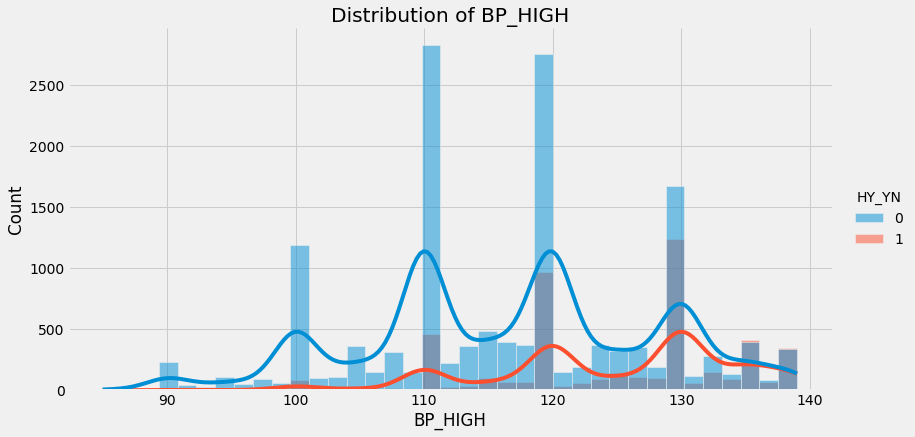

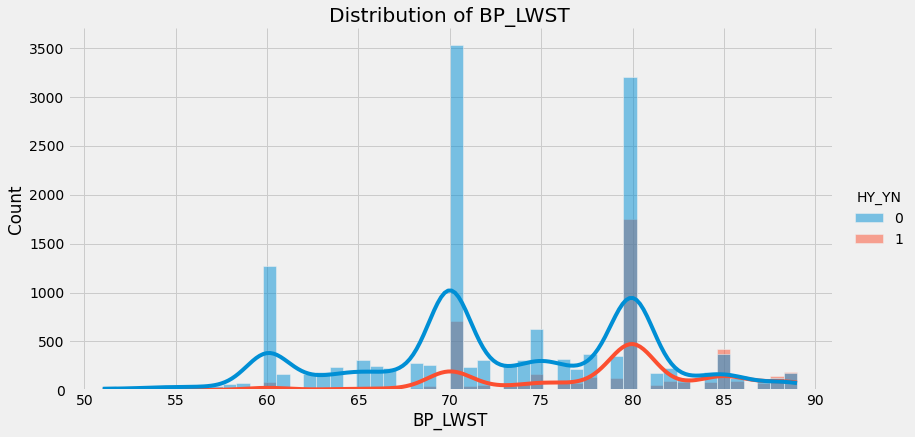

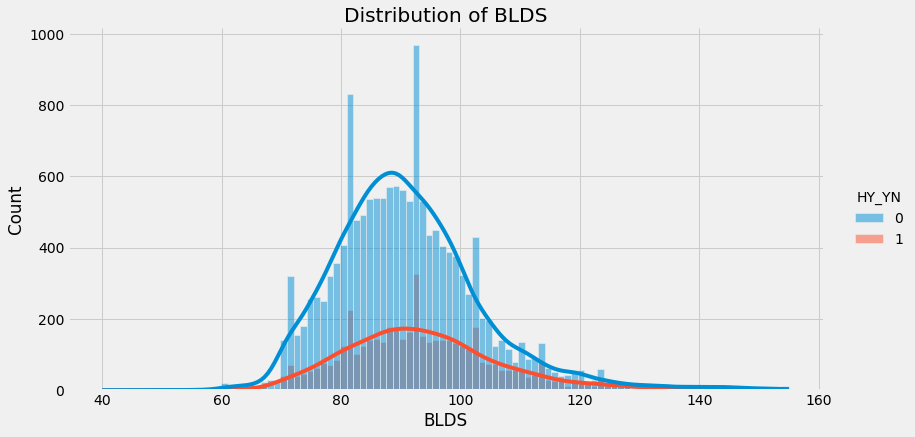

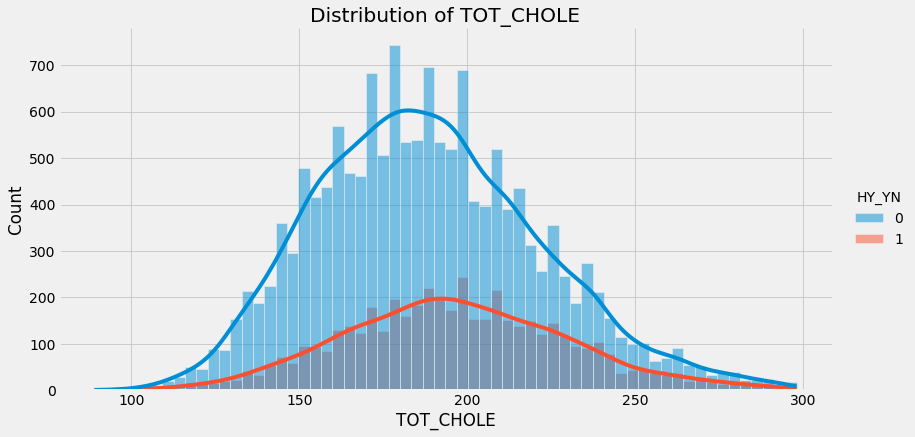

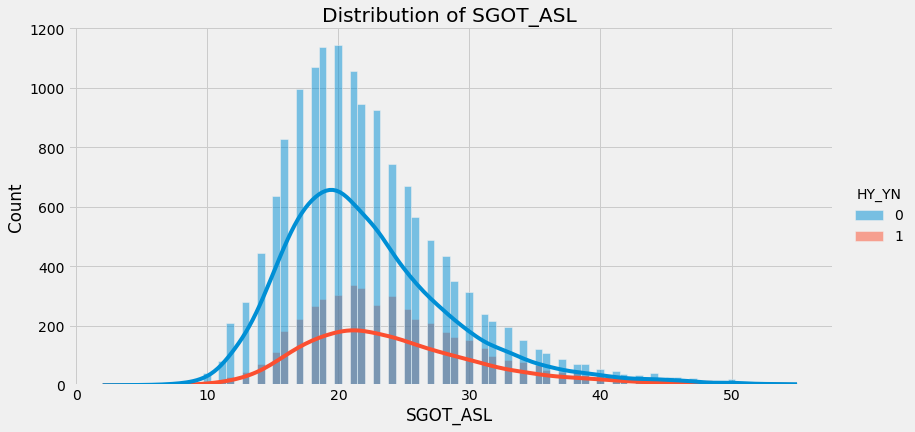

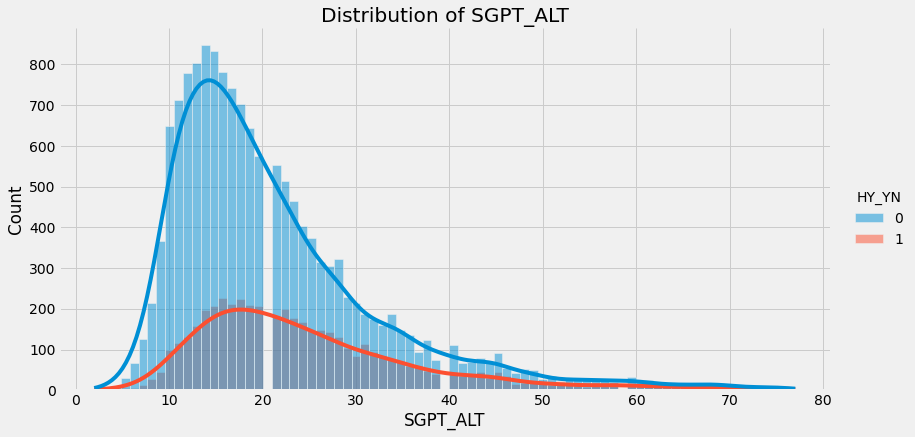

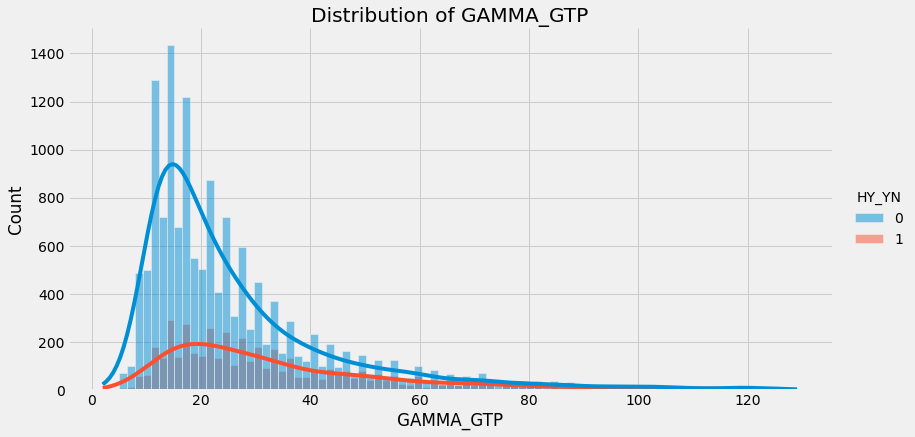

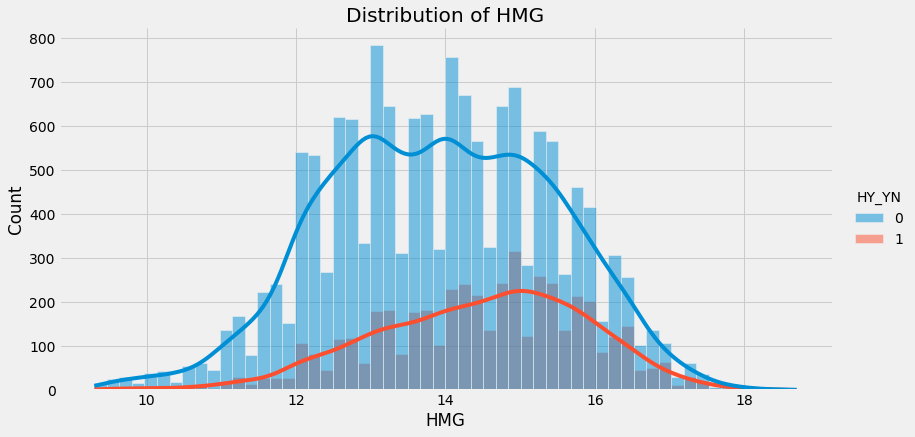

In [ ]:
# Plot the density plot and histogram for numerical features
for col in num_col:
  sns.displot(data= df, x = col, hue = 'HY_YN',kde=True,height=6,aspect=2)
  title = 'Distribution of '+ str(col)
  plt.title(title)
  plt.show()

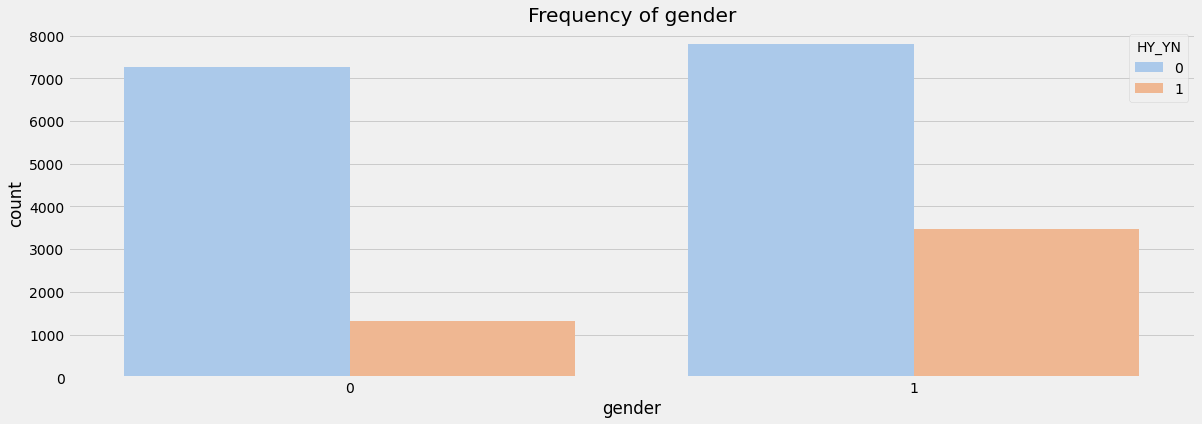

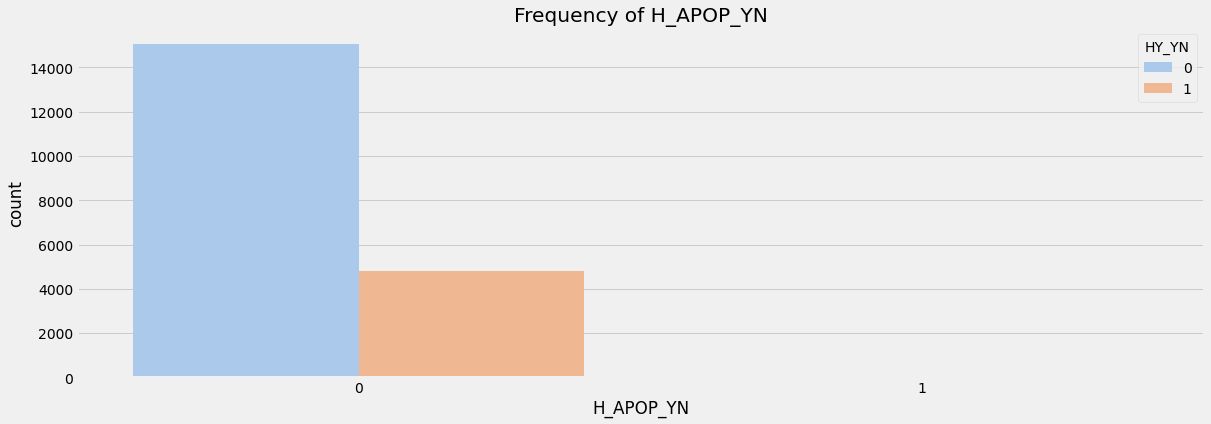

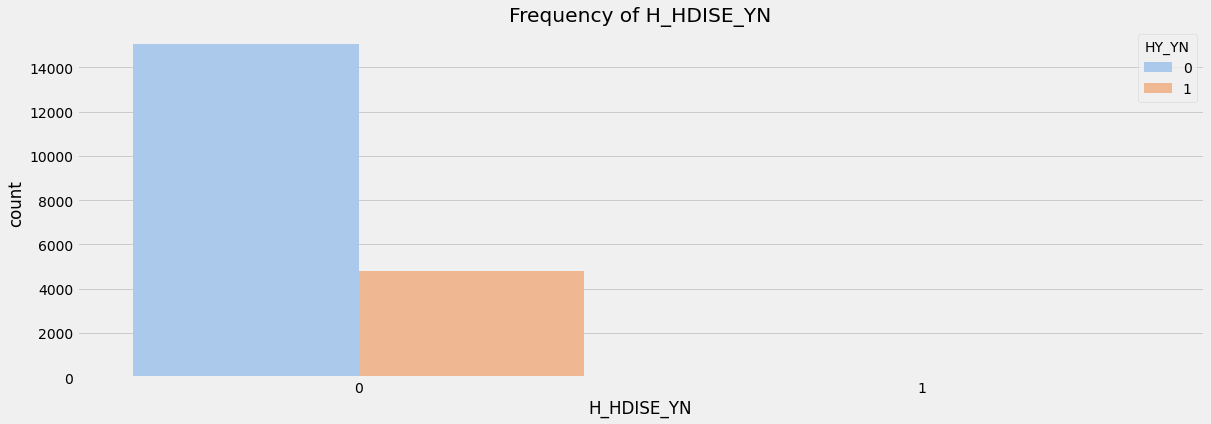

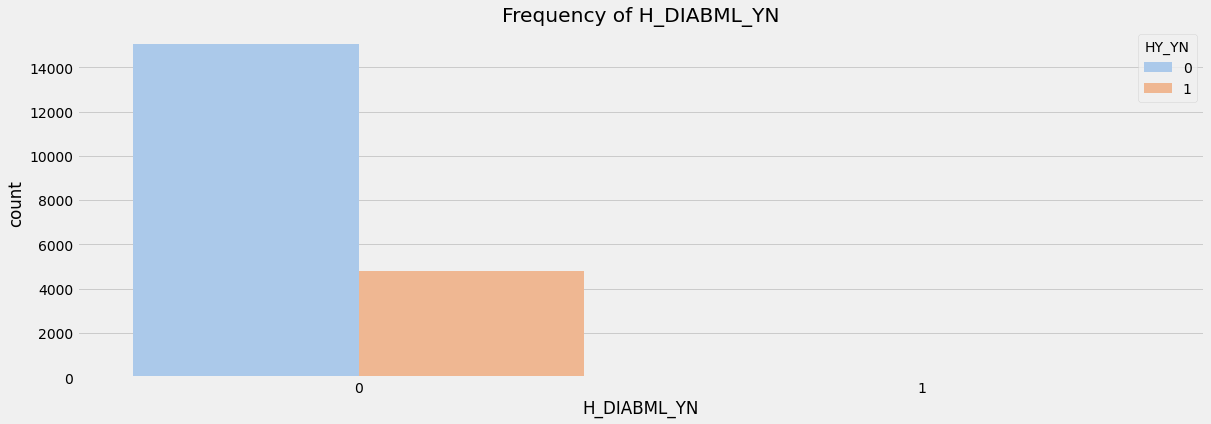

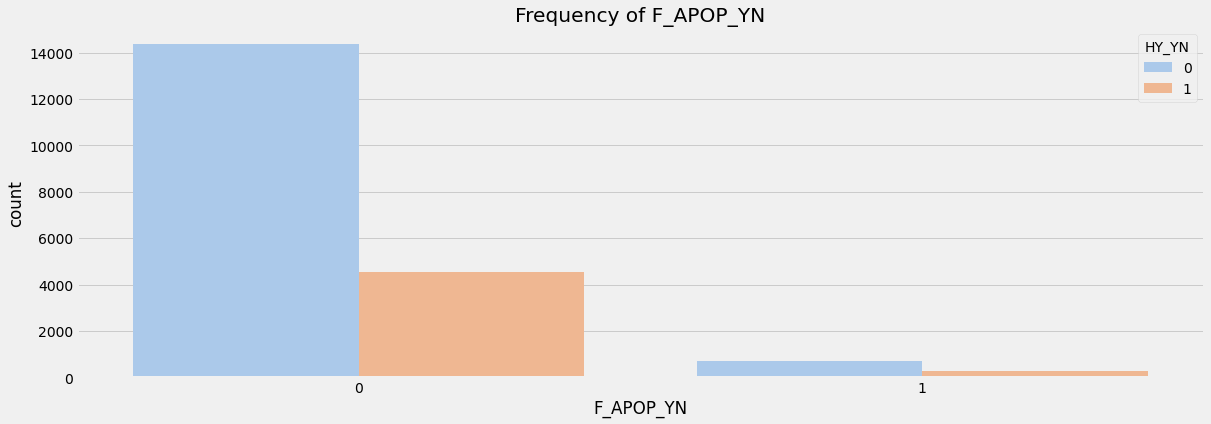

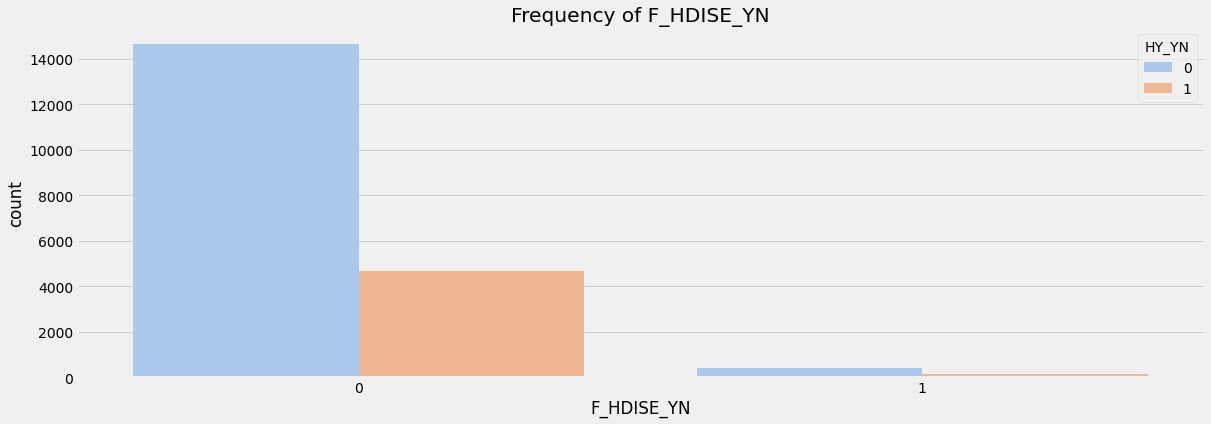

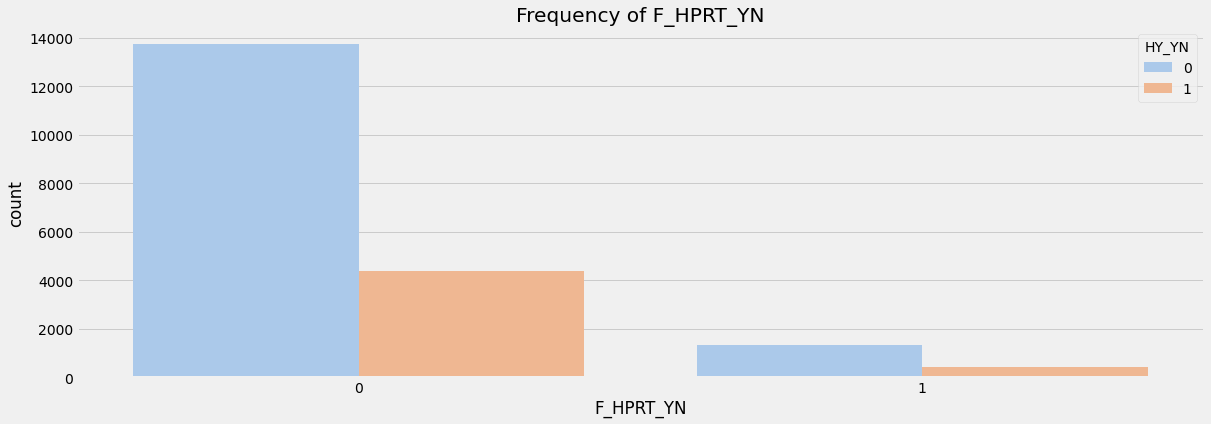

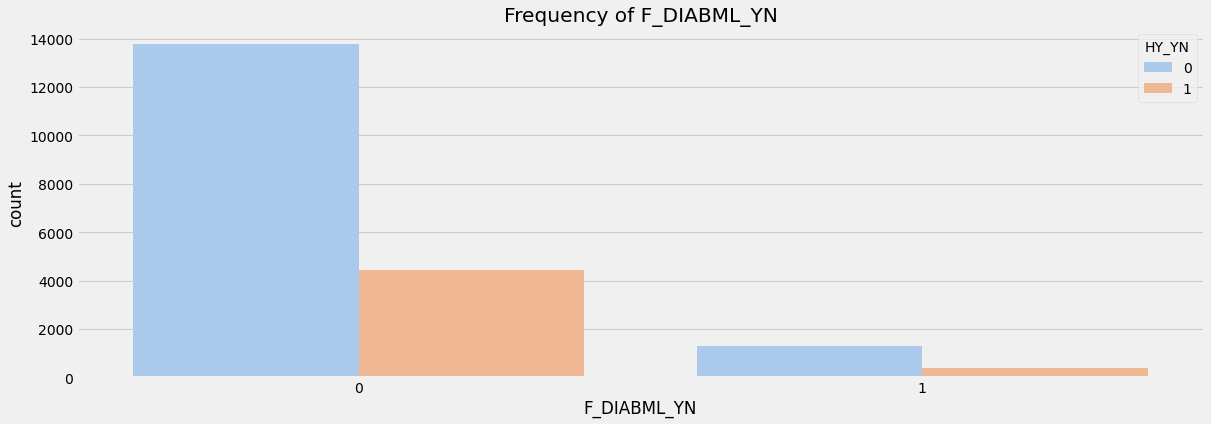

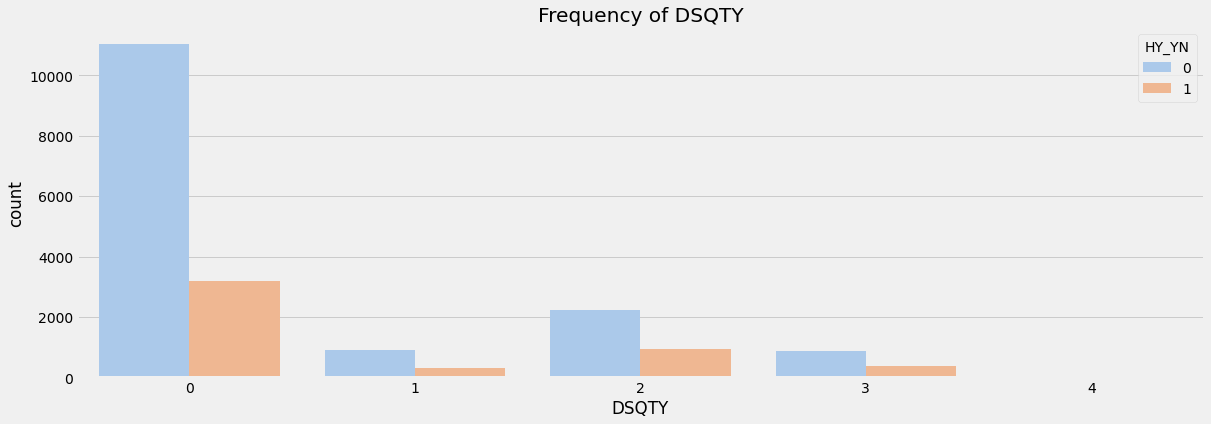

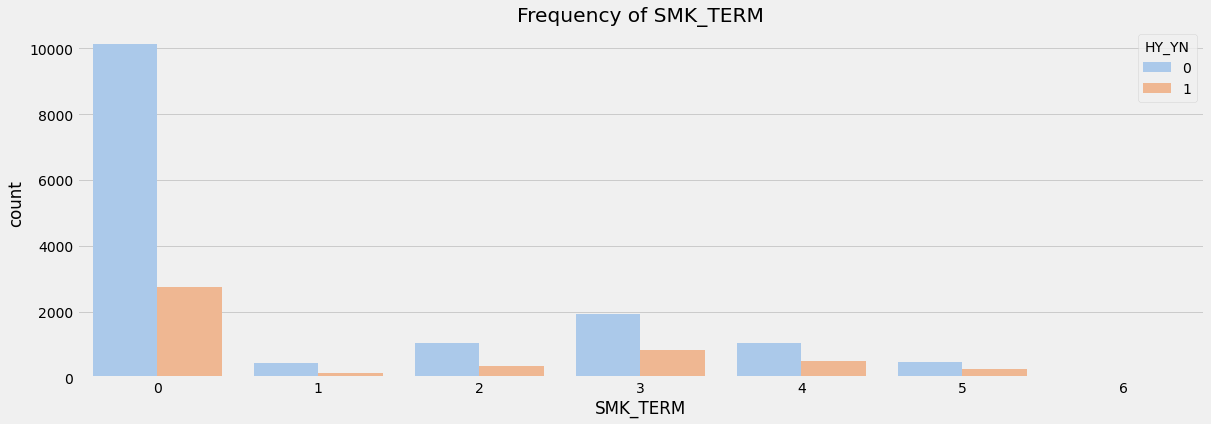

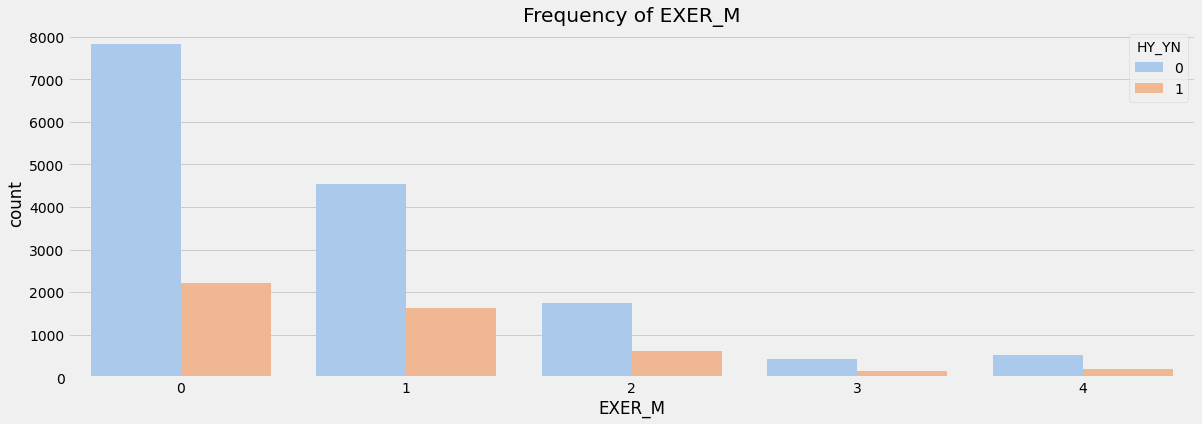

In [ ]:
# Histogram for categorical feature
for col in cat_col:
  ax = sns.countplot(x=col, hue='HY_YN', palette='pastel',data=df)
  title = 'Frequency of '+str(col)
  plt.title(title)
  plt.show()

Text(0.5, 1.0, 'Correlation heatmap')

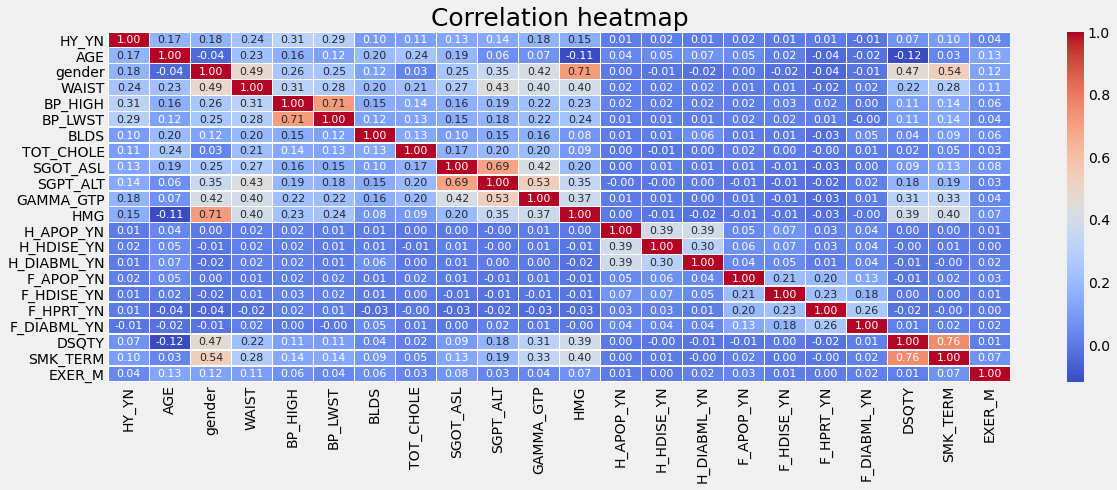

In [ ]:
# Check the correlation between features
corr = df.corr() 
f,ax = plt.subplots()
sns.heatmap(corr, annot = True, annot_kws={"size":11}, fmt= '.2f', 
            xticklabels= True, yticklabels= True,
            cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('Correlation heatmap', size=25)

In [ ]:
df['HY_YN'].value_counts(normalize = True)

0    0.758038
1    0.241962
Name: HY_YN, dtype: float64

Preprocessing

In [ ]:
# Prepare data for prediction
y = df['HY_YN']
X = df.drop(columns=['HY_YN'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
# Transforming data
ctr = ColumnTransformer([('minmax', MinMaxScaler(), num_col),
                        ('categorical', OneHotEncoder(), cat_col)],
                       remainder='passthrough')
ctr .fit(X_train)
X_train_preprocessed = ctr .transform(X_train)
X_test_preprocessed = ctr .transform(X_test)

Apply models

In [ ]:
# Define function for running model
def run_model(model, alg_name):
   model.fit(X_train, y_train)
   # make predictions for test data
   y_pred = model.predict(X_test)

   accuracy =  accuracy_score(y_test, y_pred)

   # define model evaluation method
   cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
   # evaluate model
   scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
   cr = classification_report(y_test, y_pred)

   print('Model: ', alg_name)
   print('Accuracy on Test Set for {} = {:.3f}\n'.format(alg_name,accuracy))
   print(cr)
   print('{}: CrossVal Accuracy Mean: {:.3f}\n'.format(alg_name,scores.mean()))

In [ ]:
%%time
model = LogisticRegression()
run_model(model, 'Logistic Regression')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model:  Logistic Regression
Accuracy on Test Set for Logistic Regression = 0.755

              precision    recall  f1-score   support

           0       0.77      0.97      0.86      4535
           1       0.42      0.06      0.11      1428

    accuracy                           0.75      5963
   macro avg       0.59      0.52      0.48      5963
weighted avg       0.68      0.75      0.68      5963

Logistic Regression: CrossVal Accuracy Mean: 0.753

CPU times: user 651 ms, sys: 309 ms, total: 961 ms
Wall time: 8.44 s


In [ ]:
%%time
model = KNeighborsClassifier()
run_model(model, 'Nearest Neighbors Classifier')

Model:  Nearest Neighbors Classifier
Accuracy on Test Set for Nearest Neighbors Classifier = 0.736

              precision    recall  f1-score   support

           0       0.79      0.88      0.84      4535
           1       0.42      0.27      0.33      1428

    accuracy                           0.74      5963
   macro avg       0.61      0.58      0.58      5963
weighted avg       0.70      0.74      0.71      5963

Nearest Neighbors Classifier: CrossVal Accuracy Mean: 0.734

CPU times: user 1.19 s, sys: 39.2 ms, total: 1.23 s
Wall time: 10.8 s


In [ ]:
%%time
model = svm.SVC()
run_model(model, 'Support Vector Machince Classifier')

Model:  Support Vector Machince Classifier
Accuracy on Test Set for Support Vector Machince Classifier = 0.761

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      4535
           1       0.00      0.00      0.00      1428

    accuracy                           0.76      5963
   macro avg       0.38      0.50      0.43      5963
weighted avg       0.58      0.76      0.66      5963

Support Vector Machince Classifier: CrossVal Accuracy Mean: 0.758

CPU times: user 10.4 s, sys: 445 ms, total: 10.8 s
Wall time: 4min 30s


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
%%time
model = RandomForestClassifier()
run_model(model, "Random Forest")

Model:  Random Forest
Accuracy on Test Set for Random Forest = 0.766

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      4535
           1       0.53      0.19      0.28      1428

    accuracy                           0.77      5963
   macro avg       0.66      0.57      0.57      5963
weighted avg       0.73      0.77      0.72      5963

Random Forest: CrossVal Accuracy Mean: 0.763

CPU times: user 2.7 s, sys: 71.5 ms, total: 2.77 s
Wall time: 1min 3s


Tuning hyperparameters

In [ ]:
# Apply GridSearchCV for tuning hyperparameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
#random_state=['42']
balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]
param_grid = dict(solver=solvers,penalty=penalty,C=c_values,class_weight=balance)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid,
                    n_jobs=-1,cv=cv, scoring='accuracy',error_score=0)
grid = grid.fit(X_train, y_train)
print(grid.best_estimator_)

LogisticRegression(C=0.01, class_weight={0: 1, 1: 1}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
# Fit the best estimator in model
%%time
model = grid.best_estimator_
run_model(model, 'Logistic Regression')

Model:  Logistic Regression
Accuracy on Test Set for Logistic Regression = 0.771

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      4535
           1       0.56      0.22      0.31      1428

    accuracy                           0.77      5963
   macro avg       0.68      0.58      0.59      5963
weighted avg       0.74      0.77      0.73      5963

Logistic Regression: CrossVal Accuracy Mean: 0.766

CPU times: user 2.07 s, sys: 1.09 s, total: 3.15 s
Wall time: 29.3 s


- After tuning hyperparameters, overall accuracy improves 1%;
  - while precision for normotensive(1) increases 2% and hypertensive(1) increases 14%.

In [ ]:
'''Tuning Random Forest
# Apply GridSearchCV for tuning hyperparameters
param_grid = {'n_estimators': [100,200,300],'max_depth': [80, 90, 100, 110],
              'max_features': [4, 6, 8],'random_state':[42]}
grid = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
print(grid.best_estimator_)
'''

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] max_depth=80, max_features=4, n_estimators=100, random_state=42 .


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=80, max_features=4, n_estimators=100, random_state=42, total=   1.6s
[CV] max_depth=80, max_features=4, n_estimators=100, random_state=42 .


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  max_depth=80, max_features=4, n_estimators=100, random_state=42, total=   1.6s
[CV] max_depth=80, max_features=4, n_estimators=100, random_state=42 .
[CV]  max_depth=80, max_features=4, n_estimators=100, random_state=42, total=   1.6s
[CV] max_depth=80, max_features=4, n_estimators=100, random_state=42 .
[CV]  max_depth=80, max_features=4, n_estimators=100, random_state=42, total=   1.6s
[CV] max_depth=80, max_features=4, n_estimators=100, random_state=42 .
[CV]  max_depth=80, max_features=4, n_estimators=100, random_state=42, total=   1.6s
[CV] max_depth=80, max_features=4, n_estimators=200, random_state=42 .
[CV]  max_depth=80, max_features=4, n_estimators=200, random_state=42, total=   3.2s
[CV] max_depth=80, max_features=4, n_estimators=200, random_state=42 .
[CV]  max_depth=80, max_features=4, n_estimators=200, random_state=42, total=   3.2s
[CV] max_depth=80, max_features=4, n_estimators=200, random_state=42 .
[CV]  max_depth=80, max_features=4, n_estimators=200, random_sta

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed: 12.7min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [ ]:
''' Result of tunning RF
# Fit the best estimator in model
%%time
model = grid.best_estimator_
run_model(model, 'Random Forest Classifier')
'''

Model:  Random Forest Classifier
Accuracy on Test Set for Random Forest Classifier = 0.769

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      4535
           1       0.55      0.20      0.29      1428

    accuracy                           0.77      5963
   macro avg       0.67      0.57      0.58      5963
weighted avg       0.73      0.77      0.72      5963

Random Forest Classifier: CrossVal Accuracy Mean: 0.763

CPU times: user 6.99 s, sys: 135 ms, total: 7.12 s
Wall time: 2min 31s
